<a href="https://colab.research.google.com/github/supportvectors/Data-Wrangling/blob/main/Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run common.ipynb


# Why Encode Categorical Variables?

Most machine learning algorithms cannot handle categorical variables unless we convert them to numerical values.  The performance of many algorithms vary depending on how the categorical variables are encoded.

Text or generally any non-numeric data is stored as object datatype. So if a dataframe column type is object that indicates a column has text. It's most common to one-hot encode these object type columns, since the non-numerica values can't be plugged directly into most machine learning models. 

Categorical variables can be divided into two categories: 
1. <b>Nominal</b> (No particular order) 
2. <b>Ordinal</b> (some ordered).

<u><b>Examples of variables with nominal values</b></u>

    Color: Red, Yellow, Pink, Blue

    Country: Singapore, Japan, USA, India, Korea

<u><b>Examples of variables with ordinal values</b></u>

    Strength: High, Medium, Low

    Poll question: “Strongly agree,” Agree, Neutral, Disagree, and “Strongly Disagree.”


## One Hot Encoding

To implement One hot encoding, we creates new columns with dummy variables. Each dummy variable has binary values, to indicate the presence of each possible value from the original data. The number of new dummy variables are equal to the number of categories (k) in the variable. 

For example, let’s say we have a categorical variable <b>Color</b> with three categories called “Red”, “Blue” and “Green”, then we need to use three dummy variables to encode this variable using one-hot encoding. A dummy (binary) variable just takes the value 0 or 1 to indicate the exclusion or inclusion of a category.  

<b>NOTE:</b> For each row only ONE of the dummy variables values will have a "1" value indicating the inclusion of a category. That is where the "One Hot" naming originates. It is called one-hot because only one bit is “hot” or TRUE at any time. 



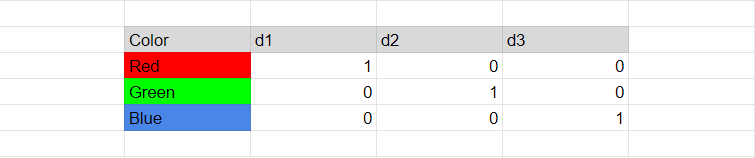

For the example above, we can see for the one-hot encoding that:

    “Red” color is encoded as [1 0 0] vector of size 3.
    “Green” color is encoded as [0 1 0] vector of size 3.
    “Blue” color is encoded as [0 0 1] vector of size 3.

## Dummy Encoding

Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). For one-hot encoding, N binary variables are required to encode N categories in a variable. Dummy encoding improvemes slightly over one-hot-encoding as dummy encoding uses N-1 features to represent N labels/categories.

To understand this better let’s see the image below. Here we are coding the same data using both one-hot encoding and dummy encoding techniques. Observe that to code three categories, one-hot encoding method uses three variables to represent the data, whereas dummy encoding uses two variables.



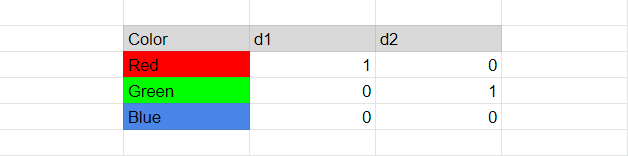

In the above "Color" example of dummy encoding:

    “Red” color is encoded as [1 0] vector of size 2.
    “Green” color is encoded as [0 1] vector of size 2.
    “Blue” color is encoded as [0 0] vector of size 2.

Dummy encoding removes a duplicate category present in the one-hot encoding. <b>The color "Blue" is essentially represented as "not Red" and "not Green".</b>

# Using Encoding on the Diamond Dataset

Now we will apply the encoding techniques on a real dataset. The Diamond dataset is a classic dataset which contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization. You can analyze diamonds by their cut, color, clarity, price, and other attributes.

Link for reference: https://www.kaggle.com/datasets/shivam2503/diamonds

The dataset is now read into a pandas dataframe below:


In [2]:
# load a dataset
import pandas as pd

# paths to the most commonly used dataset repositories for this lab

# path to pandas_for_everyone datasets repository
pfe_rep_path = 'https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/'

# path to data-wrangling-datasets repository
sv_rep_path = '../data/'

source = sv_rep_path + "diamonds.csv"

data = pd.read_csv(source)


<b> Let's peek at the first five rows of data of the diamond dataset using the .head() method: </b>

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<b> The "Unnamed" column is redundant index column, let's drop that column.</b>

In [4]:
## dropping passed columns
data.drop(["Unnamed: 0"], axis = 1, inplace = True)
  
# display
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<b> Let's find the categorical features by looking for object datatypes (value of 'O'). </b>

In [5]:
# Checking for categorical features

categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
data[categorical_features].head(10)


,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
5,Very Good,J,VVS2
6,Very Good,I,VVS1
7,Very Good,H,SI1
8,Fair,E,VS2
9,Very Good,H,VS1


<b> The result is that there are three categorical variables: cut, color, and clarity. </b>

From the Kaggle description of the diamond dataset:

    cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
    color: diamond colour, from J (worst) to D (best)
    clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

## Applying Pandas One Hot and Dummy Encoding to the Diamond Dataset

We will use the pandas methods to implement One Hot Encoding.

The pandas method <b> get_dummies()</b> is used to implement both one hot and dummy encoding.

<b> Syntax: </b> pd.get_dummies(data, prefix, dummy_na, columns, drop_first)

* data — Here we specify the data that we need to encode. It can be a NumPy array, Pandas Series or a DataFrame.

* prefix — If we specify a prefix, it will add to the column names so that we can easily identify the columns. The prefix can be specified as a string for a single column name. For multiple column names, it is defined as a dictionary mapping column names to prefixes.

* dummy_na — If False (default), missing values (NaNs) are ignored when encoding the variables. If True, this will return missing data in a separate category.

* columns — This specifies the column names to be encoded. If None (default), all categorical columns in the data parameter will be encoded. If you specify column names as a list, only the specified columns will be encoded.

* drop_first — This is the most important parameter. This takes a boolean value, True or False. 
    * If False (default), this will perform one-hot encoding. 
    * If True, this will drop the first category of each categorical variable, create k-1 dummy variables for each categorical variable and perform dummy encoding.

In [6]:
# Checking for missing values

data.isnull().sum().sum()

0

We see that there are no missing data values, so we do not have to do any missing value treatments.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB



The pandas method <b> .info() </b> also shows the variables which are of the object or category datatype. Again we observe that there are the three categorical variables in the dataset: <b>cut</b>, <b>color</b> and <b>clarity</b>.

Although from the dataset description on Kaggle we saw a listing of some of the possible values for the categorical variables, we should confirm the categories. Let's check for the <b>color</b> variable using the pandas <b>.unique()</b> method:


In [8]:
data["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

There are 7 unique categories for the <b>color</b> variable.

To encode this variable, we need to create 7 dummy variables in one-hot encoding and 6 dummy variables in dummy encoding.

### Implementing Pandas One Hot Encoding on the "color" variable

In [9]:
one_hot = pd.get_dummies(data["color"],
                         prefix="color",
                         drop_first=False)
one_hot.head(5)

,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


Note how the text specified in the prefix parameter for the <b>get_dummies</b> method is combined with the category names of color.

Now, we add one-hot encoding of the color variable to the diamond dataset.


In [10]:
one_hot_df = pd.get_dummies(data, prefix="color", 
                            columns=["color"], 
                            drop_first=False)
one_hot_df.head()

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,Premium,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,Good,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,Premium,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,Good,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1


Let's check the resulting number of rows and columns in the dataset after applying one hot encoding to the <b>color</b> variable:



In [11]:
one_hot_df.shape

(53940, 16)

Notice how now there are sixteen columns after applying one hot encoding just to the <b>color</b> variable. 



### Applying pandas one hot encoding to the entire diamond dataset

Let's apply one hot encoding to all three of the categorical variables: <b>color</b>, <b>cut</b>, and <b>clarity</b>:

In [12]:
one_hot_df = pd.get_dummies(data, prefix={'color':'color',
                                        'cut':'cut',
                                        'clarity':'clarity'},
                            drop_first=False)  # creating dummies to all the categorical features

In [13]:
one_hot_df.shape

(53940, 27)

After one hot encoding is applied to all three of the categorical variables,the diamond dataset now has 27 columns. This is because one-hot encoding has added 20 extra dummy variables. So, either type of dummy encoding (or any encoding expands the feature space (dimensionality) in your dataset.

### Applying pandas dummy encoding to the entire diamond dataset

To implement dummy encoding to the data, you can follow the same steps performed in one-hot encoding. The only difference is that you should <b>set the drop_first parameter to True instead of False.</b>


In [14]:
dummy_df = pd.get_dummies(data, prefix={'color':'color', 
                                      'cut':'cut',
                                      'clarity':'clarity'},
                          drop_first=True)



In [15]:
dummy_df.shape

(53940, 24)

In [16]:
dummy_df.head(4)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [17]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse =True)



Let us load the data again to demonstrate OneHotEncoder using SKlearn.


In [18]:
import pandas as pd

source = sv_rep_path + "diamonds.csv"

data = pd.read_csv(source)

In [19]:
# Again, drop the useless "Unnamed" column.

data.drop(["Unnamed: 0"], axis = 1, inplace = True)
  
# display
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Let's apply the sklearn OneHotEncoder (ohe) to the <b>color</b> variable of the diamond dataset:


In [20]:

ohe.fit_transform(data[['color']])


<53940x7 sparse matrix of type '<class 'numpy.float64'>'
	with 53940 stored elements in Compressed Sparse Row format>

Which are the category values seen by the OneHotEncoder class? We can check using the <b>categories</b> method:



In [21]:
ohe.categories_

[array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)]

In [22]:
from sklearn.preprocessing import OneHotEncoder
# Instantiate OneHotEncoder

ohe = OneHotEncoder(categories='auto', 
                    drop=None,sparse=False)
ohe_df = pd.DataFrame(ohe.fit_transform(data[['cut', 
                                            'color', 'clarity']]))

In [23]:
ohe_df.shape

(53940, 20)

So after using the sklearn OneHotEncoder class to implement one hot encoding for all three categorical variables, we used the <b>shape</b> method to show that there are 20 columns, same as after applying one hot encoding using pandas.


The encoded dataset has 24 variables. This is because dummy encoding has added 17 extra dummy variables when encoding the categorical variables. So, dummy encoding also expands the feature space (dimensionality) in your dataset.

## Dummy encoding with Scikit-learn

In [24]:
#You can simply do this by specifying the drop parameter to ‘first’.
de = OneHotEncoder(categories='auto', 
                    drop='first',sparse=False)

de_df = pd.DataFrame(de.fit_transform(data[['cut', 
                                            'color', 'clarity']]))

In [25]:
de_df.shape

(53940, 17)

In [26]:
de_df.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


This returns only the encoded categorical data, not the entire dataset with numerical variables.

## Encoding Ordinal Data using Scikit-Learn

Let's use the sklearn package OrdinalEncoder class on the Diamond dataset, for the <b>cut</b> variable.

OrdinalEncoder differs from OneHotEncoder such that it assigns incremental values to the categories of an ordinal variable. 


In [27]:
# ordinal encode input variables

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["cut_ord"] = ord_enc.fit_transform(data[["cut"]])
data[["cut_ord", "cut"]].head(10)


,cut_ord,cut
0,2.0,Ideal
1,3.0,Premium
2,1.0,Good
3,3.0,Premium
4,1.0,Good
5,4.0,Very Good
6,4.0,Very Good
7,4.0,Very Good
8,0.0,Fair
9,4.0,Very Good


In [28]:
data['cut']

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object

## Label Encoding Using the OrdinalEncoder

The OrdinalEncoder target labels with values between 0 and n_classes-1.
The OrdinalEncoder transformer should be used to encode target values, i.e. y, and not the input X.

If we strictly want to keep the natural order of an ordinal categorical variable, we use <b>label encoding</b> instead of the two types of encoding that we’ve discussed above.

Let’s say we have a categorical variable <b>quality</b> with three categories called “Fair”, “Good” and “Premium”. The natural order of these categories is:

Fair < Good < Premium => 0 < 1 < 2

In [29]:
## Label encoding is used to encode the target variables
 
from sklearn.preprocessing import LabelEncoder
data['cut_enc'] = LabelEncoder().fit_transform(data['cut'])
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_ord,cut_enc
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2.0,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.0,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3.0,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0,1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,4.0,4
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,4.0,4
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,4.0,4
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,0.0,0
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,4.0,4


Label encoding <u>does not expand the feature space</u> at all as we just replace category names with numbers. Here, we do not use dummy variables.

The major disadvantage of label encoding is that machine learning algorithms may consider there may be relationships between the encoded categories. 

For example, an algorithm may interpret Premium (2) as two times better than Good (1). Actually, there is no such relationship between the categories.
To avoid this, <b><u>label encoding should only be applied to target (y) values, not to input (X) values</b></u>.

Label encoding can be applied by using Scikit-learn’s LabelEncoder function. Now, we apply it to the <b>Gender</b> variable in the below dataset. 


In [30]:
import pandas as pd 
data = {"Gender":['M','F','F','M','F','F','F'], "NAME":['John','Camili','Rheana','Joseph','Amanti','Alexa','Siri']}
data = pd.DataFrame(data)
print("Original Data frame:\n")
print(data)

Original Data frame:

  Gender    NAME
0      M    John
1      F  Camili
2      F  Rheana
3      M  Joseph
4      F  Amanti
5      F   Alexa
6      F    Siri


In [31]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
data['Gender']= label.fit_transform(data['Gender']) 
print(data['Gender'].unique())

[1 0]


In [32]:
print(data)

   Gender    NAME
0       1    John
1       0  Camili
2       0  Rheana
3       1  Joseph
4       0  Amanti
5       0   Alexa
6       0    Siri
